#📌 Extracción

In [24]:
import pandas as pd
import requests

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
response = requests.get(url)
datos = pd.DataFrame(response.json())

In [30]:
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

## **Conociendo Conjunto de Datos**

In [34]:
from pandas import json_normalize

dict_cols = [c for c in df.columns if df[c].apply(lambda x: isinstance(x, dict)).any()]
for col in dict_cols:

    expanded = json_normalize(df[col]).add_prefix(f"{col}_")
    df = pd.concat([df.drop(columns=[col]), expanded], axis=1)

In [33]:
df.columns = (
    df.columns.str.strip()
              .str.lower()
              .str.replace(' ', '_', regex=False)
              .str.replace(r'[^0-9a-z_]+', '', regex=True)
)

In [35]:
for c in [c for c in df.columns if 'tenure' in c]:
    df[c] = pd.to_numeric(df[c], errors='coerce')

In [36]:
# - cargos: monthly / total (cualquier columna que contenga 'charges')
for c in [c for c in df.columns if 'charges' in c]:
    # a veces vienen como string con espacios vacíos → coerce
    df[c] = pd.to_numeric(df[c], errors='coerce')

In [37]:
for cand in ['seniorcitizen', 'customer_seniorcitizen']:
    if cand in df.columns:
        df[cand] = pd.to_numeric(df[cand], errors='coerce').astype('Int64')
        break

In [38]:
for cid in ['customerid', 'customer_id']:
    if cid in df.columns:
        antes = len(df)
        df = df.drop_duplicates(subset=[cid])
        print(f"Duplicados por {cid} eliminados: {antes - len(df)}")
        break

Duplicados por customerid eliminados: 0


## **Comprobacion de incoherencias en los datos**

In [48]:
# Ver nombres y tipos de todas las columnas
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7267 non-null   object 
 1   churn                      7043 non-null   float64
 2   customer_gender            7267 non-null   object 
 3   customer_seniorcitizen     7267 non-null   Int64  
 4   customer_partner           7267 non-null   int64  
 5   customer_dependents        7267 non-null   int64  
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   int64  
 8   phone_multiplelines        7267 non-null   object 
 9   internet_internetservice   7267 non-null   object 
 10  internet_onlinesecurity    7267 non-null   object 
 11  internet_onlinebackup      7267 non-null   object 
 12  internet_deviceprotection  7267 non-null   object 
 13  internet_techsupport       7267 non-null   objec

In [47]:
# Vista rápida de las primeras filas
display(df.head())

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_chargesmonthly,account_chargestotal
0,0002-ORFBO,0.0,Female,0,1,1,9,1,No,DSL,...,Yes,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30
1,0003-MKNFE,0.0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1.0,Male,1,1,0,13,1,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40


In [49]:
# Cantidad de valores únicos por columna (para detectar categóricas vs numéricas)
display(df.nunique())

,0
customerid,7267
churn,2
customer_gender,2
customer_seniorcitizen,2
customer_partner,2
customer_dependents,2
customer_tenure,73
phone_phoneservice,2
phone_multiplelines,3
internet_internetservice,3


In [52]:
# Resumen estadístico para numéricas
display(df.describe())

,churn,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,account_paperlessbilling,account_chargesmonthly,account_chargestotal
count,7043.000000,7267.0,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7256.000000
mean,0.265370,0.162653,0.484106,0.300124,32.346498,0.902711,0.593230,64.720098,2280.634213
std,0.441561,0.369074,0.499782,0.458343,24.571773,0.296371,0.491265,30.129572,2268.632997
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000
25%,0.000000,0.0,0.000000,0.000000,9.000000,1.000000,0.000000,35.425000,400.225000
50%,0.000000,0.0,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1391.000000
75%,1.000000,0.0,1.000000,1.000000,55.000000,1.000000,1.000000,89.875000,3785.300000
max,1.000000,1.0,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000


In [51]:
# Resumen estadístico para categóricas
display(df.describe(include='object'))

,customerid,customer_gender,phone_multiplelines,internet_internetservice,internet_onlinesecurity,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paymentmethod
count,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267
unique,7267,2,3,3,3,3,3,3,3,3,3,4
top,9995-HOTOH,Male,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check
freq,1,3675,3495,3198,3608,3182,3195,3582,2896,2870,4005,2445


### **Las columnas mas relevantes para el analisis de evasion son las siguientes:**


*   Contrato y método de pago → clientes con contrato mes a mes y débito automático suelen tener más churn.
*   Servicios de internet y adicionales → quienes no contratan extras suelen irse más.
*   Antigüedad (tenure) → clientes nuevos son más propensos a irse.
*   Gastos (monthlycharges, totalcharges) → cargos altos suelen relacionarse con más churn.
*   Demográficas (seniorcitizen, dependents, partner) → ayudan pero no son tan determinantes.








## **Manejo de Incosistencias**

In [53]:
# Conteo de valores faltantes por columna
print(df.isnull().sum())

# Porcentaje de nulos
print("\nPorcentaje de valores nulos:")
print((df.isnull().mean() * 100).round(2))

customerid                     0
churn                        224
customer_gender                0
customer_seniorcitizen         0
customer_partner               0
customer_dependents            0
customer_tenure                0
phone_phoneservice             0
phone_multiplelines            0
internet_internetservice       0
internet_onlinesecurity        0
internet_onlinebackup          0
internet_deviceprotection      0
internet_techsupport           0
internet_streamingtv           0
internet_streamingmovies       0
account_contract               0
account_paperlessbilling       0
account_paymentmethod          0
account_chargesmonthly         0
account_chargestotal          11
dtype: int64

Porcentaje de valores nulos:
customerid                   0.00
churn                        3.08
customer_gender              0.00
customer_seniorcitizen       0.00
customer_partner             0.00
customer_dependents          0.00
customer_tenure              0.00
phone_phoneservice        

In [54]:
# Duplicados totales
print("Duplicados totales:", df.duplicated().sum())

# Duplicados por customerid
if 'customerid' in df.columns:
    print("Duplicados por customerid:", df['customerid'].duplicated().sum())

Duplicados totales: 0
Duplicados por customerid: 0


In [56]:
# Verificar si hay valores negativos en cargos/tenure
for c in ['customer_tenure', 'account_chargesmonthly', 'account_chargestotal']:
    if c in df.columns:
        print(f"{c} - valores negativos:", (df[c] < 0).sum())

customer_tenure - valores negativos: 0
account_chargesmonthly - valores negativos: 0
account_chargestotal - valores negativos: 0


In [57]:
# Valores únicos en columnas categóricas
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"\nColumna: {col}")
    print(df[col].unique())


Columna: customerid
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Columna: customer_gender
['Female' 'Male']

Columna: phone_multiplelines
['No' 'Yes' 'No phone service']

Columna: internet_internetservice
['DSL' 'Fiber optic' 'No']

Columna: internet_onlinesecurity
['No' 'Yes' 'No internet service']

Columna: internet_onlinebackup
['Yes' 'No' 'No internet service']

Columna: internet_deviceprotection
['No' 'Yes' 'No internet service']

Columna: internet_techsupport
['Yes' 'No' 'No internet service']

Columna: internet_streamingtv
['Yes' 'No' 'No internet service']

Columna: internet_streamingmovies
['No' 'Yes' 'No internet service']

Columna: account_contract
['One year' 'Month-to-month' 'Two year']

Columna: account_paymentmethod
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [59]:
df = df.dropna(subset=['churn']).copy()

In [60]:
df['churn'] = df['churn'].astype(int)

In [63]:
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].str.strip().str.lower()

In [67]:
for col in cat_cols:
    print(f"\nColumna: {col}")
    print(df[col].unique())


Columna: customerid
['0002-orfbo' '0003-mknfe' '0004-tlhlj' ... '9992-ujoel' '9993-lhieb'
 '9995-hotoh']

Columna: customer_gender
['female' 'male']

Columna: phone_multiplelines
['no' 'yes']

Columna: internet_internetservice
['dsl' 'fiber optic' 'no']

Columna: internet_onlinesecurity
['no' 'yes']

Columna: internet_onlinebackup
['yes' 'no']

Columna: internet_deviceprotection
['no' 'yes']

Columna: internet_techsupport
['yes' 'no']

Columna: internet_streamingtv
['yes' 'no']

Columna: internet_streamingmovies
['no' 'yes']

Columna: account_contract
['one year' 'month-to-month' 'two year']

Columna: account_paymentmethod
['mailed check' 'electronic check' 'credit card (automatic)'
 'bank transfer (automatic)']


In [68]:
df['account_chargestotal'] = df['account_chargestotal'].fillna(0)

In [70]:
# Conteo de valores faltantes por columna
print(df.isnull().sum())

# Porcentaje de nulos
print("\nPorcentaje de valores nulos:")
print((df.isnull().mean() * 100).round(2))

customerid                   0
churn                        0
customer_gender              0
customer_seniorcitizen       0
customer_partner             0
customer_dependents          0
customer_tenure              0
phone_phoneservice           0
phone_multiplelines          0
internet_internetservice     0
internet_onlinesecurity      0
internet_onlinebackup        0
internet_deviceprotection    0
internet_techsupport         0
internet_streamingtv         0
internet_streamingmovies     0
account_contract             0
account_paperlessbilling     0
account_paymentmethod        0
account_chargesmonthly       0
account_chargestotal         0
dtype: int64

Porcentaje de valores nulos:
customerid                   0.0
churn                        0.0
customer_gender              0.0
customer_seniorcitizen       0.0
customer_partner             0.0
customer_dependents          0.0
customer_tenure              0.0
phone_phoneservice           0.0
phone_multiplelines          0.0
internet_

## **Columna de cuentas diarias**

In [71]:
# Crear columna cuentas_diarias a partir de cargos mensuales
df['cuentas_diarias'] = df['account_chargesmonthly'] / 30

In [72]:
print(df[['account_chargesmonthly', 'cuentas_diarias']].head(10))

   account_chargesmonthly  cuentas_diarias
0                   65.60         2.186667
1                   59.90         1.996667
2                   73.90         2.463333
3                   98.00         3.266667
4                   83.90         2.796667
5                   69.40         2.313333
6                  109.70         3.656667
7                   84.65         2.821667
8                   48.20         1.606667
9                   90.45         3.015000


## **Estandarización y transformación**

#📊 Carga y análisis

In [93]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## **Analisis Descriptivo**

In [75]:
# Seleccionamos solo columnas numéricas relevantes
num_cols = ['customer_tenure', 'account_chargesmonthly', 'account_chargestotal', 'cuentas_diarias']

In [92]:
# Calculo de métricas descriptivas personalizadas
desc_stats = pd.DataFrame({
    'media': df[num_cols].mean(),
    'mediana': df[num_cols].median(),
    'desviacion_std': df[num_cols].std(),
    'minimo': df[num_cols].min(),
    'maximo': df[num_cols].max(),
    'q1 (25%)': df[num_cols].quantile(0.25),
    'q3 (75%)': df[num_cols].quantile(0.75)
})

In [78]:
print("📊 Análisis descriptivo de variables numéricas:")
display(desc_stats.round(2))

📊 Análisis descriptivo de variables numéricas:


,media,mediana,desviacion_std,minimo,maximo,q1 (25%),q3 (75%)
customer_tenure,32.37,29.00,24.56,0.00,72.00,9.00,55.00
account_chargesmonthly,64.76,70.35,30.09,18.25,118.75,35.50,89.85
account_chargestotal,2279.73,1394.55,2266.79,0.00,8684.80,398.55,3786.60
cuentas_diarias,2.16,2.34,1.00,0.61,3.96,1.18,2.99


## **Distribución de evasión**

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
churn_counts = df['churn'].value_counts()

In [82]:
churn_percent = df['churn'].value_counts(normalize=True) * 100

In [83]:
print("Distribución de churn (conteo):")
print(churn_counts)
print("\nDistribución de churn (%):")
print(churn_percent.round(2))

Distribución de churn (conteo):
churn
0    5174
1    1869
Name: count, dtype: int64

Distribución de churn (%):
churn
0    73.46
1    26.54
Name: proportion, dtype: float64


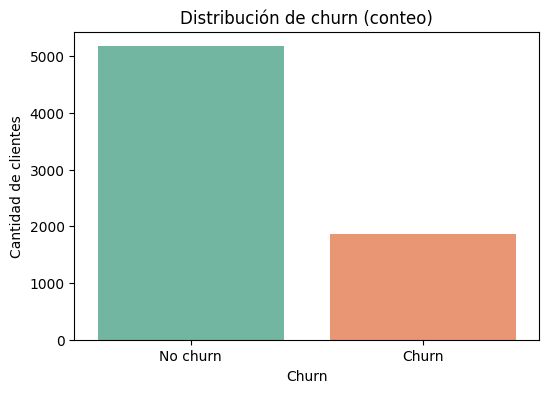

In [94]:
plt.figure(figsize=(6,4))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="Set2")
plt.xticks([0,1], ["No churn", "Churn"])
plt.title("Distribución de churn (conteo)")
plt.ylabel("Cantidad de clientes")
plt.xlabel("Churn")
plt.show()

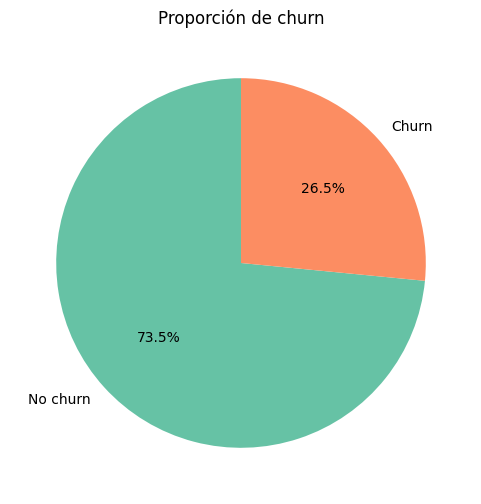

In [95]:
plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=["No churn", "Churn"], autopct='%1.1f%%', startangle=90, colors=["#66c2a5","#fc8d62"])
plt.title("Proporción de churn")
plt.show()

## **Recuento de evasión por variables categóricas**

In [96]:
cat_cols = [
    'customer_gender',
    'account_contract',
    'account_paymentmethod',
    'account_paperlessbilling',
    'internet_internetservice'
]

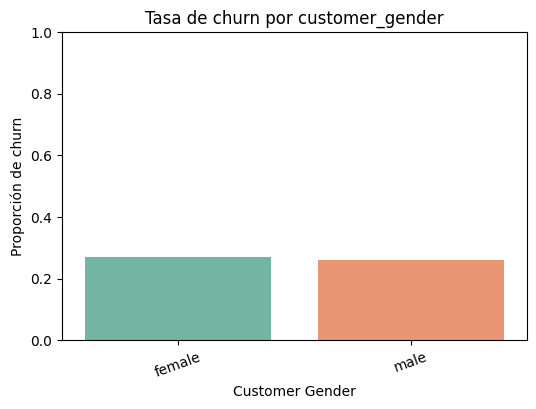

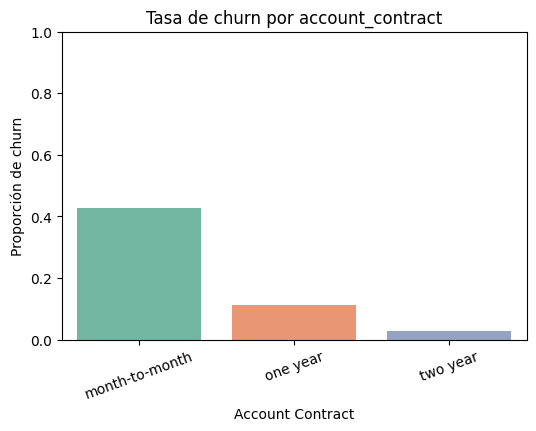

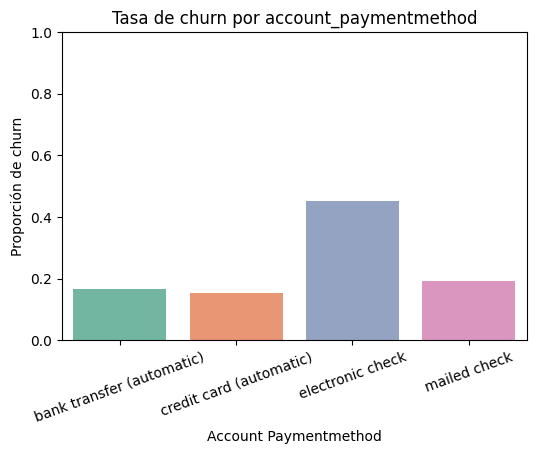

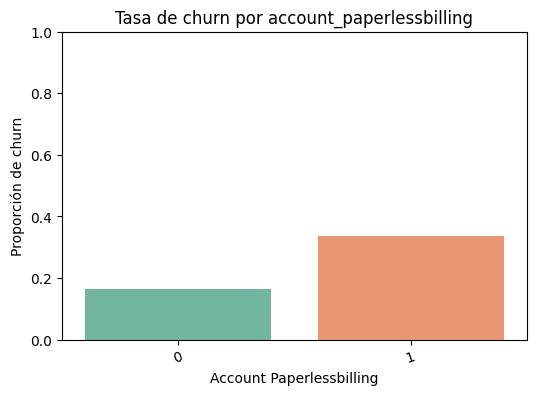

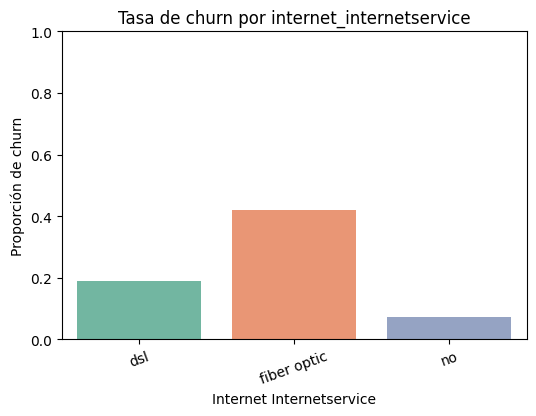

In [99]:
for col in cat_cols:
    plt.figure(figsize=(6,4))
    churn_rate = df.groupby(col)['churn'].mean().reset_index()
    sns.barplot(x=col, y='churn', data=churn_rate, palette="Set2")
    plt.title(f"Tasa de churn por {col}")
    plt.ylabel("Proporción de churn")
    plt.xlabel(col.replace("_"," ").title())
    plt.xticks(rotation=20)
    plt.ylim(0,1)
    plt.show()

## **Coteo de evasión por variables numéricas**

In [102]:
num_cols = [
    'customer_tenure',
    'account_chargesmonthly',
    'account_chargestotal',
    'cuentas_diarias'
]

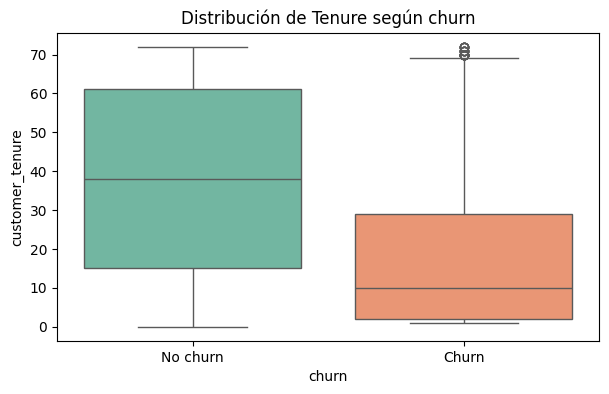

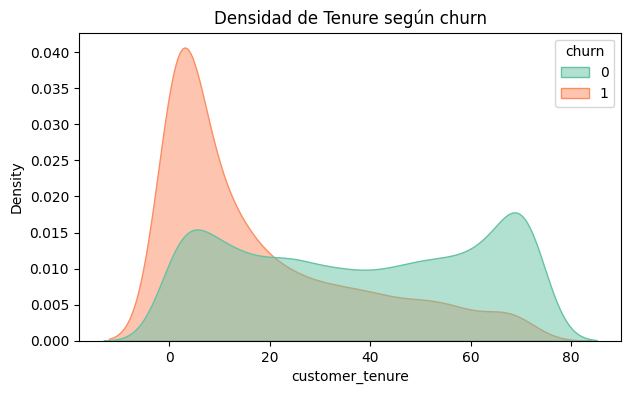

In [104]:
# Tenure vs churn
plt.figure(figsize=(7,4))
sns.boxplot(x='churn', y='customer_tenure', data=df, palette="Set2")
plt.title("Distribución de Tenure según churn")
plt.xticks([0,1], ["No churn","Churn"])
plt.show()



plt.figure(figsize=(7,4))
sns.kdeplot(data=df, x='customer_tenure', hue='churn', fill=True, common_norm=False, palette="Set2", alpha=0.5)
plt.title("Densidad de Tenure según churn")
plt.show()

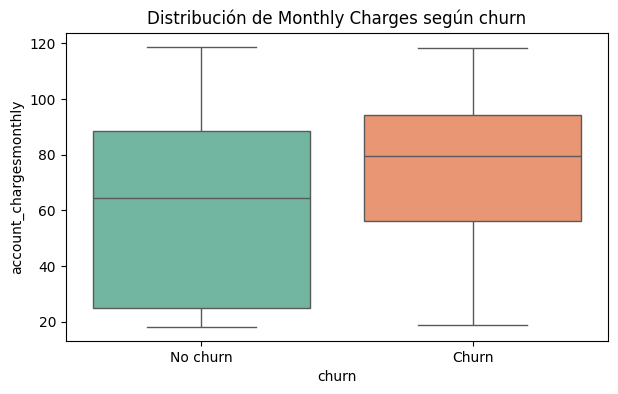

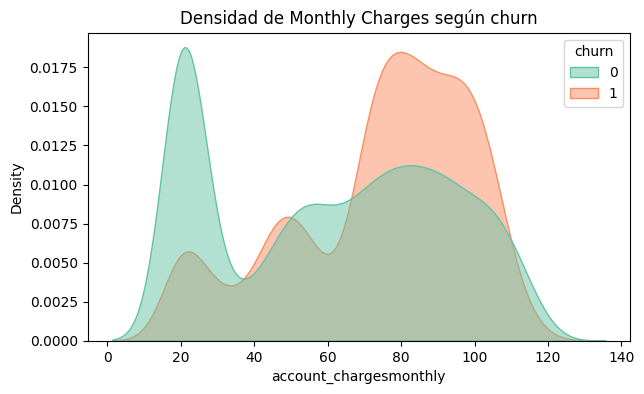

In [105]:
# Monthly charges vs churn
plt.figure(figsize=(7,4))
sns.boxplot(x='churn', y='account_chargesmonthly', data=df, palette="Set2")
plt.title("Distribución de Monthly Charges según churn")
plt.xticks([0,1], ["No churn","Churn"])
plt.show()

plt.figure(figsize=(7,4))
sns.kdeplot(data=df, x='account_chargesmonthly', hue='churn', fill=True, common_norm=False, palette="Set2", alpha=0.5)
plt.title("Densidad de Monthly Charges según churn")
plt.show()

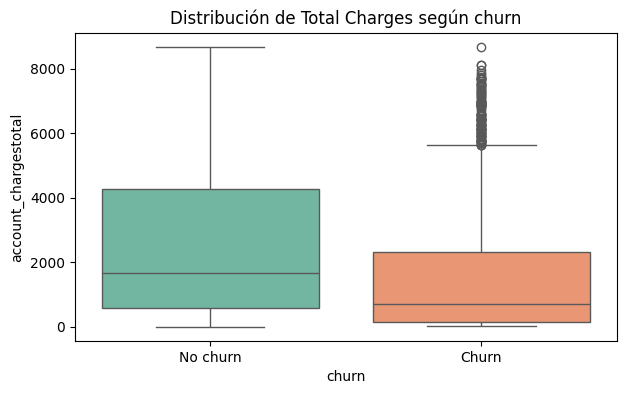

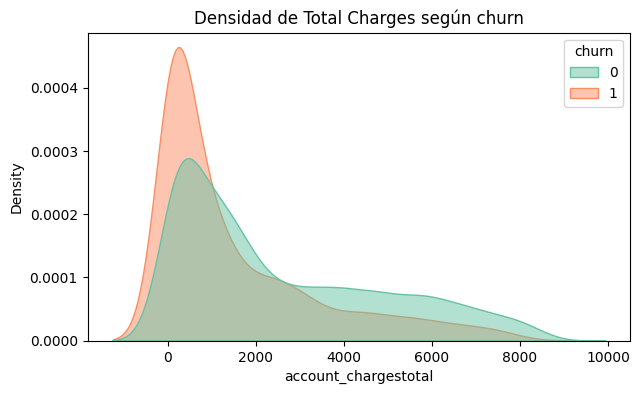

In [106]:
# Total charges vs churn
plt.figure(figsize=(7,4))
sns.boxplot(x='churn', y='account_chargestotal', data=df, palette="Set2")
plt.title("Distribución de Total Charges según churn")
plt.xticks([0,1], ["No churn","Churn"])
plt.show()

plt.figure(figsize=(7,4))
sns.kdeplot(data=df, x='account_chargestotal', hue='churn', fill=True, common_norm=False, palette="Set2", alpha=0.5)
plt.title("Densidad de Total Charges según churn")
plt.show()

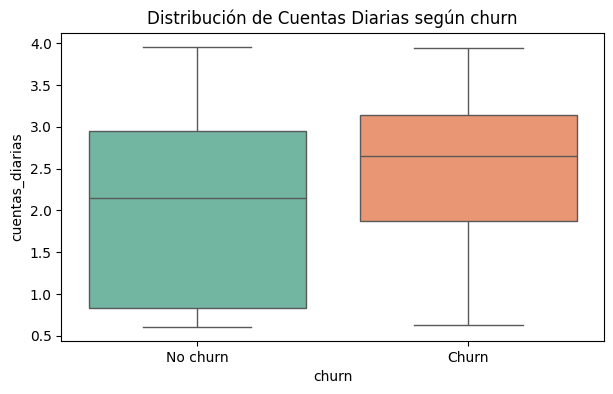

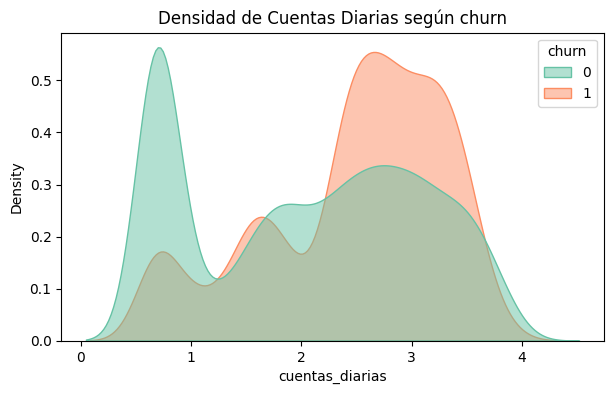

In [107]:
# Cuentas diarias vs churn
plt.figure(figsize=(7,4))
sns.boxplot(x='churn', y='cuentas_diarias', data=df, palette="Set2")
plt.title("Distribución de Cuentas Diarias según churn")
plt.xticks([0,1], ["No churn","Churn"])
plt.show()

plt.figure(figsize=(7,4))
sns.kdeplot(data=df, x='cuentas_diarias', hue='churn', fill=True, common_norm=False, palette="Set2", alpha=0.5)
plt.title("Densidad de Cuentas Diarias según churn")
plt.show()

#📄Informe final

## 1) **Introducción**

**Objetivo:** Analizar la evasión de clientes (churn) en Telecom X para identificar factores asociados a la baja y proponer acciones que reduzcan la pérdida de clientes.

**Alcance:** Se realizó ETL desde una fuente web (API/RAW GitHub), limpieza, transformación, análisis descriptivo y exploratorio con visualizaciones, y un cierre con insights y recomendaciones.

## 2) **Limpieza y Tratamiento de Datos (ETL)**


* **Extracción:** datos cargados directamente desde la web (endpoint/API o URL RAW de GitHub) y convertidos a `DataFrame`.

*   **Transformación estructural:** columnas anidadas (`customer`, `phone`, `internet`, `account`) aplanadas con prefijos; nombres homogeneizados a `snake_case`.
* **Estandarización de categorías:**
  - Reemplazo de `"no internet service"` y `"no phone service"` por `"no"` (evita terceras categorías espurias).
  - Normalización de strings (espacios, mayúsculas).

* **Tipos de datos:** `tenure`, `chargesmonthly`, `chargestotal` y `seniorcitizen`
* **Valores ausentes y consistencia:**
  - `churn:` 224 nulos → filtrados (no sirven para análisis supervisado).
  - `account_chargestotal:`11 nulos → imputados en 0 (clientes con antigüedad ~0).
  - Sin duplicados por `customerid`. Sin negativos en montos/tenure.

## 3) **Análisis Exploratorio de Datos**

**Métricas descriptivas (numéricas)**

  * `tenure:` distribución sesgada hacia valores bajos (más clientes recientes).
  
  * `chargesmonthly`: variabilidad moderada/alta (planes/paquetes distintos).
  
  * `chargestotal`: crece con la antigüedad; valores muy bajos concentran clientes nuevos.
  
  * `cuentas_diarias` (= `chargesmonthly/30`): referencia granular diaria para análisis comparativo.

**Distribución de churn**
  * Tasa de churn observada ≈ 26–27% (la mayoría permanece, pero la evasión es material).

**Churn por variables categóricas (patrones frecuentes)**

  * **Contrato** `(account_contract)`: Month-to-month presenta mayor churn que One/Two year.
  * **Método de pago** `(account_paymentmethod)`: métodos como electronic check suelen asociarse a más churn.
  * **Facturación** `(account_paperlessbilling)`: paperless muestra mayor churn relativo `(posible perfil más “price-sensitive”)`.
  * **Internet** `(internet_internetservice)`: fiber optic suele tener churn más alto que DSL; quienes no contratan servicios adicionales (onlinesecurity, techsupport, etc.) muestran mayor churn.
  * **Género** `(customer_gender)`: generalmente sin diferencias significativas.

**Numerica vs Churn**

  * **Menor** `tenure` → mayor churn (riesgo de “early churn”).

  * `chargesmonthly` **altos** → tienden a mayor churn (sensibilidad a precio / desalineación de valor percibido).

  * `chargestotal` **bajo** (clientes nuevos) → mayor churn.

  * `cuentas_diarias` replica el patrón de `chargesmonthly` a escala diaria.

## 4) **Conclusiones e Insights**
  1. **El churn se concentra en clientes recientes** (bajo `tenure`).
  2. **Contratos mes-a-mes muestran mayor propensión** a la baja que contratos de 1–2 años.
  3. **Cargos mensuales altos** se asocian a una **mayor evasión.**
  4. **Falta de servicios adicionales** (seguridad, soporte) se relaciona con **menor fidelización.**
  5. **Métodos de pago** como electronic check y **paperless billing** correlacionan con churn más elevado (perfil más sensible al precio, menor inercia contractual).

## 5) **Recomendaciones Estratégicas**

  **Retención temprana (0–3 meses):**
  
*   Programa de **onboarding y primeras-6-semanas:** educación de beneficios, check-ins proactivos, ofertas de bienvenida.
*   **Alertas** por uso bajo o tickets/reclamos tempranos.

**Retención temprana (0–3 meses):**
*  **Migración incentivada** de **Month-to-month** → 1/2 años (descuentos temporales, meses bonificados).
*  **Bundles** con **onlinesecurity/techsupport** a precio preferencial (aumentar “enganche”).
*  **Revisión de planes con** `chargesmonthly` alto (re‐segmentar oferta / descuentos dirigidos).

**Pago y facturación**
*  Incentivar métodos con **menor churn**(ej. débito automático/tarjeta) y revisar comunicación de paperless (evitar percepción “cobro frío / poco valor”).

**Experiencia y soporte**
*  **Detección temprana** de clientes con múltiples reclamos → ruta de atención prioritaria.
*  **Encuestas NPS/CSAT** post-soporte y acciones correctivas rápidas.

**Analítica continua**
*  **Entrenar un modelo de propensión a churn** (Logistic/Tree-based), explicar drivers (SHAP), y activar campañas de retención automáticas (segmentos alto-riesgo).
*  **Monitoreo mensual** de tasa de churn y cohortes por contrato/plan.

In [117]:
import pandas as pd
import numpy as np

# --- Métricas base ---
n = len(df)
churn_rate = df['churn'].mean() * 100

num_cols = ['customer_tenure','account_chargesmonthly','account_chargestotal','cuentas_diarias']
desc = df[num_cols].agg(['mean','median','std','min','max']).T.round(2)

# Churn por categorías clave
def churn_table(col):
    t = df.groupby(col)['churn'].mean().mul(100).sort_values(ascending=False).round(2)
    return t.to_frame('churn_%')

cats = {
    'Contrato': 'account_contract',
    'Método de pago': 'account_paymentmethod',
    'Paperless': 'account_paperlessbilling',
    'Internet': 'internet_internetservice'
}

print(f"Total de clientes analizados: {n}")
print(f"Tasa de churn ( % ): {churn_rate:.2f}\n")

print("Descriptivo numéricas")
display(desc)

for label, col in cats.items():
    if col in df.columns:
        print(f"\nChurn por {label} ({col})")
        display(churn_table(col).head(10))

Total de clientes analizados: 7043
Tasa de churn ( % ): 26.54

Descriptivo numéricas


,mean,median,std,min,max
customer_tenure,32.37,29.00,24.56,0.00,72.00
account_chargesmonthly,64.76,70.35,30.09,18.25,118.75
account_chargestotal,2279.73,1394.55,2266.79,0.00,8684.80
cuentas_diarias,2.16,2.34,1.00,0.61,3.96



Churn por Contrato (account_contract)


,churn_%
account_contract,
month-to-month,42.71
one year,11.27
two year,2.83



Churn por Método de pago (account_paymentmethod)


,churn_%
account_paymentmethod,
electronic check,45.29
mailed check,19.11
bank transfer (automatic),16.71
credit card (automatic),15.24



Churn por Paperless (account_paperlessbilling)


,churn_%
account_paperlessbilling,
1,33.57
0,16.33



Churn por Internet (internet_internetservice)


,churn_%
internet_internetservice,
fiber optic,41.89
dsl,18.96
no,7.40
